In [91]:
import numpy as np

# List of file names
files = ["lsst_bands/total_g.dat", "lsst_bands/total_i.dat", "lsst_bands/total_r.dat", 
         "lsst_bands/total_u.dat", "lsst_bands/total_y.dat", "lsst_bands/total_z.dat"]

# List of band names corresponding to the files
band_names = ['g', 'i', 'r', 'u', 'y', 'z']

# Initialize a dictionary to store wavelengths and throughputs for each band
lsst_bands = {}

# Loop over the files and extract both wavelengths and throughputs
for file, band in zip(files, band_names):
    # Open the file
    with open(file, 'r') as f:
        # Skip the header lines (we'll assume the first 6 lines are headers)
        for _ in range(6):
            next(f)
        
        # Read the wavelength and throughput data
        data = np.loadtxt(f)
        
        # Extract wavelengths (the first column) and throughputs (the second column)
        wavelengths = data[:, 0]
        throughputs = data[:, 1]
        
        # Store the data as a tuple (wavelengths, throughputs) for each band
        lsst_bands[band] = (wavelengths, throughputs)

# Now lsst_bands is a dictionary where the key is the band name and the value is a tuple of (wavelengths, throughputs)
for band, (wavelengths, throughputs) in lsst_bands.items():
    print(f"Band: {band}")
    print(f"Wavelengths: {wavelengths[:10]}...")  # Show the first 10 values for brevity
    print(f"Throughputs: {throughputs[:10]}...")  # Show the first 10 values for brevity
    print("\n")


Band: g
Wavelengths: [300.  300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9]...
Throughputs: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...


Band: i
Wavelengths: [300.  300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9]...
Throughputs: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...


Band: r
Wavelengths: [300.  300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9]...
Throughputs: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...


Band: u
Wavelengths: [300.  300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9]...
Throughputs: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...


Band: y
Wavelengths: [300.  300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9]...
Throughputs: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...


Band: z
Wavelengths: [300.  300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9]...
Throughputs: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...




In [25]:
from astropy.io import fits

# Define file paths for the three bands
file_paths = [
    "euclid_bands/NISP-PHOTO-PASSBANDS-V1-H_throughput.fits",
    "euclid_bands/NISP-PHOTO-PASSBANDS-V1-J_throughput.fits",
    "euclid_bands/NISP-PHOTO-PASSBANDS-V1-Y_throughput.fits"
]

# Initialize dictionary to hold throughput data
euclid_bands = {}

# Loop through each file and read the data
for file in file_paths:
    # Open the FITS file
    with fits.open(file) as hdul:
        # The data you need is usually in the first extension (index 1)
        data = hdul[1].data
        
        # Extract the relevant columns
        wavelengths = data['WAVE']
        throughput = data['T_TOTAL']

        # Extract the band name from the filename (e.g., 'H', 'J', 'Y')
        band_name = file.split('-')[4][0]  # Extract band name
        
        # Save to dictionary
        euclid_bands[band_name] = (wavelengths, throughput)

# Output the data for all bands
for band, (wavelengths, throughput) in euclid_bands.items():
    print(f"Band: {band}")
    print(f"Wavelengths: {wavelengths[:10]}...")  # Show the first 10 values for brevity
    print(f"Throughputs: {throughput[:10]}...")  # Show the first 10 values for brevity
    print("\n")


Band: H
Wavelengths: [1405 1406 1407 1408 1409 1410 1411 1412 1413 1414]...
Throughputs: [7.39323e-05 7.87152e-05 8.80195e-05 7.98104e-05 8.04887e-05 8.96503e-05
 8.68784e-05 8.00460e-05 9.38240e-05 8.66659e-05]...


Band: J
Wavelengths: [1005 1006 1007 1008 1009 1010 1011 1012 1013 1014]...
Throughputs: [ 3.29775e-05  2.35482e-05  2.60136e-06  1.00941e-05  5.41753e-06
  9.53938e-07  1.96221e-05  1.00275e-05 -7.38718e-07 -1.79183e-05]...


Band: Y
Wavelengths: [905 906 907 908 909 910 911 912 913 914]...
Throughputs: [7.51130e-08 1.91012e-08 1.35019e-07 2.78543e-08 4.65030e-08 4.93864e-08
 5.00486e-08 6.81400e-08 8.43386e-08 1.18578e-07]...




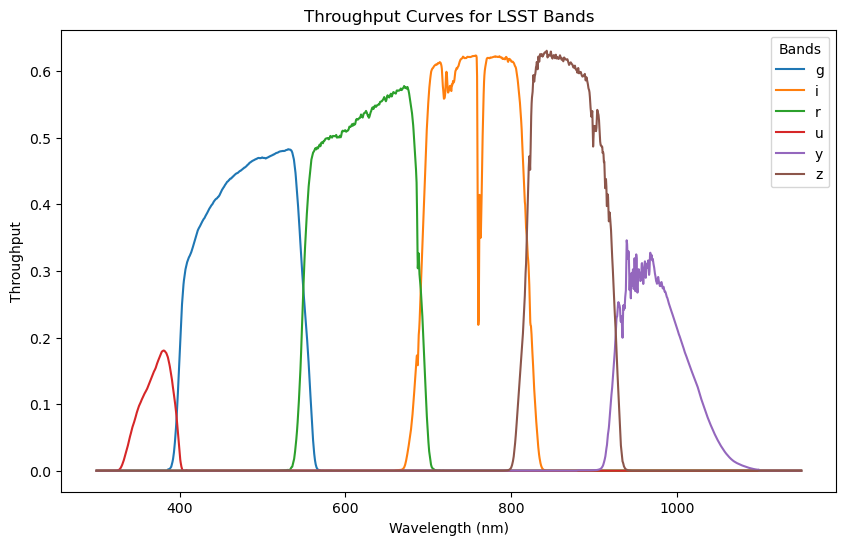

In [93]:
import matplotlib.pyplot as plt

# Assuming lsst_bands is already defined, e.g., like this:
# lsst_bands = {
#     'g': (wavelengths_g, throughputs_g),
#     'i': (wavelengths_i, throughputs_i),
#     'r': (wavelengths_r, throughputs_r),
#     'u': (wavelengths_u, throughputs_u),
#     'y': (wavelengths_y, throughputs_y),
#     'z': (wavelengths_z, throughputs_z)
# }

# Now, let's plot the throughput curve for each band
plt.figure(figsize=(10, 6))

# Loop over the bands and plot the throughput for each
for band, (wavelengths, throughputs) in lsst_bands.items():
    plt.plot(wavelengths, throughputs, label=band)

# Set plot labels and title
plt.xlabel("Wavelength (nm)")
plt.ylabel("Throughput")
plt.title("Throughput Curves for LSST Bands")
plt.legend(title="Bands")

# Show the plot
plt.show()


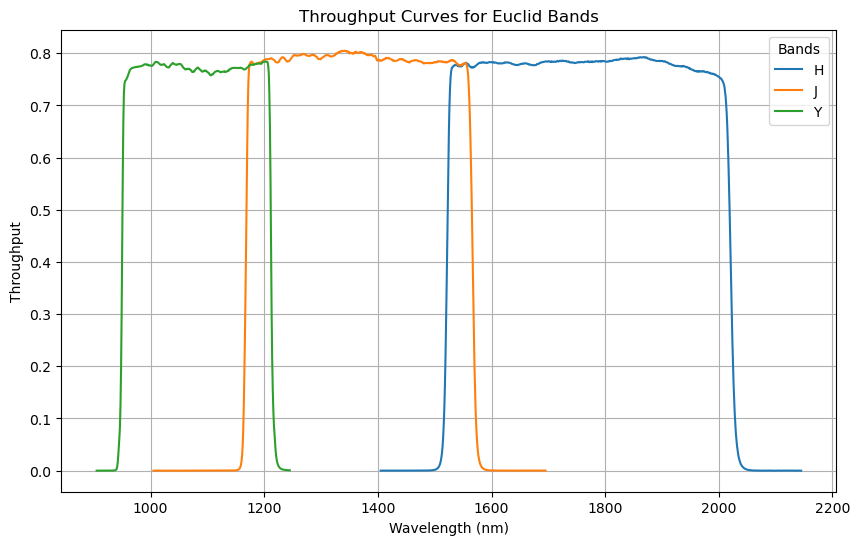

In [27]:
import matplotlib.pyplot as plt

# Assuming the data is already read into the euclid_bands dictionary
# Example: euclid_bands = {'H': (wavelengths_h, throughputs_h), 'J': (wavelengths_j, throughputs_j), 'Y': (wavelengths_y, throughputs_y)}

# Now, let's plot the throughput curve for each band
plt.figure(figsize=(10, 6))

# Loop over the bands and plot the throughput for each
for band, (wavelengths, throughputs) in euclid_bands.items():
    plt.plot(wavelengths, throughputs, label=band)

# Set plot labels and title
plt.xlabel("Wavelength (nm)")
plt.ylabel("Throughput")
plt.title("Throughput Curves for Euclid Bands")
plt.legend(title="Bands")

# Show the plot
plt.grid(True)
plt.show()

In [28]:
import pandas as pd

# Read the TSV file into a DataFrame
df = pd.read_csv('HSC_throughputs.tsv', sep='\t')

# Extract the wavelength column and the flux values for each band
wavelength = df['λ'].values  # Assuming the wavelength column is labeled 'λ'
flux_hsc_g = df['HSC-g'].values
flux_hsc_r2 = df['HSC-r2'].values
flux_hsc_i2 = df['HSC-i2'].values
flux_hsc_z = df['HSC-z'].values
flux_hsc_y = df['HSC-y'].values
flux_hsc_r = df['HSC-r'].values
flux_hsc_i = df['HSC-i'].values

# Now create the dictionary with wavelength and flux vectors for each band
HSC_bands = {
    'HSC-g': {'wavelength': wavelength, 'flux': flux_hsc_g},
    'HSC-r2': {'wavelength': wavelength, 'flux': flux_hsc_r2},
    'HSC-i2': {'wavelength': wavelength, 'flux': flux_hsc_i2},
    'HSC-z': {'wavelength': wavelength, 'flux': flux_hsc_z},
    'HSC-y': {'wavelength': wavelength, 'flux': flux_hsc_y},
    'HSC-r': {'wavelength': wavelength, 'flux': flux_hsc_r},
    'HSC-i': {'wavelength': wavelength, 'flux': flux_hsc_i}
}

# You can now access the wavelength and flux for each band using the HSC_bands dictionary
# For example, you can print the wavelength and flux for the HSC-g band:
print("Wavelengths in HSC-g band:", HSC_bands['HSC-g']['wavelength'][:5])  # Print first few wavelengths
print("Flux in HSC-g band:", HSC_bands['HSC-g']['flux'][:5])  # Print first few flux values


Wavelengths in HSC-g band: [380 385 390 395 400]
Flux in HSC-g band: [ 0.65  0.58  0.65  3.24 71.97]


In [32]:
import pandas as pd

# Read the TSV file into a DataFrame
df = pd.read_csv('CFHT_throughputs.tsv', sep='\t', header=None, names=['Wavelength', 'Flux'])

# Now you have the wavelength and flux data
wavelength = df['Wavelength'].values
flux = df['Flux'].values

# Print the wavelength and flux
print("Wavelengths:", wavelength)
print("Flux:", flux)

# Example: Store the data in a dictionary
cfht_data = {
    'Wavelength': wavelength,
    'Flux': flux
}

Wavelengths: [562 560 558 556 554 552 550 548 546 544 542 540 538 536 534 532 530 528
 526 524 522 520 518 516 514 512 510 508 506 504 502 500 498 496 494 492
 490 488 486 484 482 480 478 476 474 472 470 468 466 464 462 460 458 456
 454 452 450 448 446 444 442 440 438 436 434 432 430 428 426 424 422 420
 418 416 414 412 410 408 406 404 402 400 398 396 394 392 390 388 386 384
 382 380 378 376 374 372 370 368 366 364 362 360 358 356 354 352 350 348
 346 344 342 340 338 336 334 332 330 328 326 324 322 320 318 316 314 312
 310 308 306 304 302 300 298 296 294 292 290 288 286 284 282 280 278 276
 274 272 270 268 266 264 262 260 258 256 254 252 250 248 246 244 242 240
 238 236 234 232 230 228 226 224 222 220 218 216 214 212 210 208 206 204
 202 200 198 196 194 192 190]
Flux: [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  

In [39]:
# Function to read the throughput file and extract wavelength and throughput
def read_throughput_file(file_name):
    # Read the file, skip headers, and extract wavelength and throughput
    wavelength = []
    throughput = []
    
    with open(file_name, 'r') as f:
        lines = f.readlines()
        
        # Loop through the lines and extract data after the header
        for line in lines:
            # Skip lines starting with "#" (comments) and empty lines
            if line.startswith("#") or line.strip() == "":
                continue
            # Extract wavelength and throughput values
            parts = line.split()
            if len(parts) == 2:
                wavelength.append(float(parts[0]))
                throughput.append(float(parts[1]))
    
    return np.array(wavelength), np.array(throughput)

# Define the file names for each UVISTA filter
filter_files = {
    "UVISTA_Y": "uvista_bands/uvista_Y.txt",
    "UVISTA_J": "uvista_bands/uvista_J.txt",
    "UVISTA_H": "uvista_bands/uvista_H.txt",
    "UVISTA_Ks": "uvista_bands/uvista_Ks.txt",
}

# Dictionary to hold the throughputs for each filter
uvista_band_throughputs = {}

# Read throughputs for each filter
for band, file_name in filter_files.items():
    wavelength, throughput = read_throughput_file(file_name)
    uvista_band_throughputs[band] = {
        "wavelength": wavelength / 1000 * 100,
        "throughput": throughput
    }

# Example: Print the throughput data for UVISTA Ks band
print("UVISTA_Ks band throughput data:")
print("Wavelengths:", uvista_band_throughputs["UVISTA_Ks"]["wavelength"])
print("Throughputs:", uvista_band_throughputs["UVISTA_Ks"]["throughput"])

# You can print the data for the other bands in a similar manner
print("UVISTA_Y band throughput data:")
print("Wavelengths:", uvista_band_throughputs["UVISTA_Y"]["wavelength"])
print("Throughputs:", uvista_band_throughputs["UVISTA_Y"]["throughput"])

print("UVISTA_J band throughput data:")
print("Wavelengths:", uvista_band_throughputs["UVISTA_J"]["wavelength"])
print("Throughputs:", uvista_band_throughputs["UVISTA_J"]["throughput"])

print("UVISTA_H band throughput data:")
print("Wavelengths:", uvista_band_throughputs["UVISTA_H"]["wavelength"])
print("Throughputs:", uvista_band_throughputs["UVISTA_H"]["throughput"])

UVISTA_Ks band throughput data:
Wavelengths: [1905. 1907. 1909. 1911. 1913. 1915. 1917. 1919. 1921. 1923. 1925. 1927.
 1929. 1931. 1933. 1935. 1937. 1939. 1941. 1943. 1945. 1947. 1949. 1951.
 1953. 1955. 1957. 1959. 1961. 1963. 1965. 1967. 1969. 1971. 1973. 1975.
 1977. 1979. 1981. 1983. 1985. 1987. 1989. 1991. 1993. 1995. 1997. 1999.
 2001. 2003. 2005. 2007. 2009. 2011. 2013. 2015. 2017. 2019. 2021. 2023.
 2025. 2027. 2029. 2031. 2033. 2035. 2037. 2039. 2041. 2043. 2045. 2047.
 2049. 2051. 2053. 2055. 2057. 2059. 2061. 2063. 2065. 2067. 2069. 2071.
 2073. 2075. 2077. 2079. 2081. 2083. 2085. 2087. 2089. 2091. 2093. 2095.
 2097. 2099. 2101. 2103. 2105. 2107. 2109. 2111. 2113. 2115. 2117. 2119.
 2121. 2123. 2125. 2127. 2129. 2131. 2133. 2135. 2137. 2139. 2141. 2143.
 2145. 2147. 2149. 2151. 2153. 2155. 2157. 2159. 2161. 2163. 2165. 2167.
 2169. 2171. 2173. 2175. 2177. 2179. 2181. 2183. 2185. 2187. 2189. 2191.
 2193. 2195. 2197. 2199. 2201. 2203. 2205. 2207. 2209. 2211. 2213. 2215.
 2217.

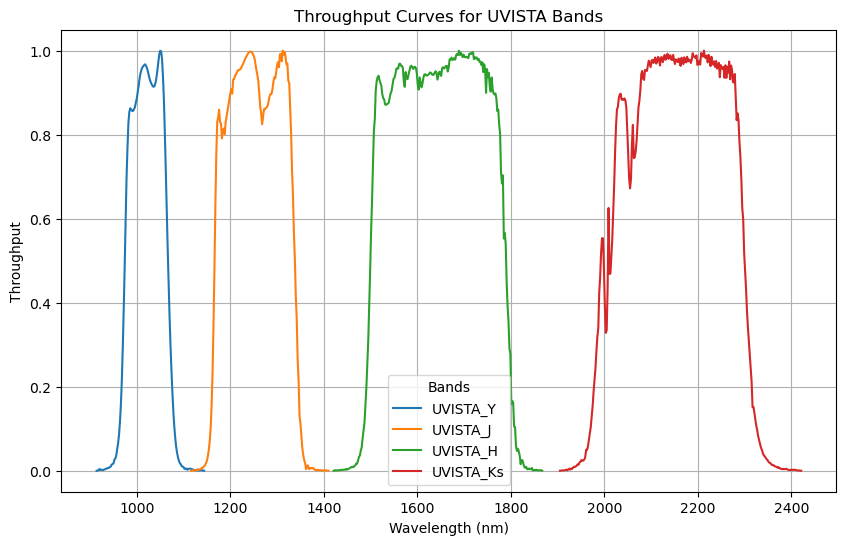

In [41]:
import matplotlib.pyplot as plt

# Assuming the data is already read into the uvista_band_throughputs dictionary

# Now, let's plot the throughput curve for each band
plt.figure(figsize=(10, 6))

# Loop over the bands and plot the throughput for each
for band, data in uvista_band_throughputs.items():
    wavelengths = data["wavelength"]  # Access the wavelength data
    throughputs = data["throughput"]  # Access the throughput data
    plt.plot(wavelengths, throughputs, label=band)

# Set plot labels and title
plt.xlabel("Wavelength (nm)")
plt.ylabel("Throughput")
plt.title("Throughput Curves for UVISTA Bands")
plt.legend(title="Bands")

# Show the plot
plt.show()


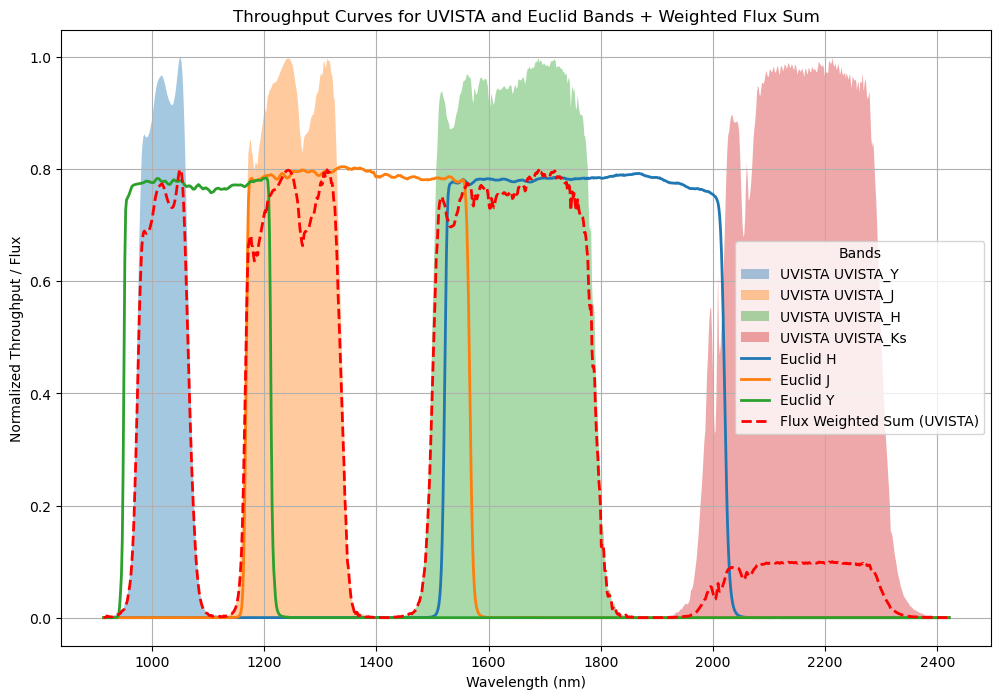

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the UVISTA and Euclid data are already available
# uvista_band_throughputs: a dictionary with band name as keys, and a dictionary containing 'wavelength' and 'throughput' as values.
# euclid_bands: a dictionary with band name as keys, and a tuple containing 'wavelength' and 'throughput' as values.

# Weights for the UVISTA bands
uvista_weights = {
    "UVISTA_Y": 0.8,
    "UVISTA_J": 0.8,
    "UVISTA_H": 0.8,
    "UVISTA_Ks": 0.1
}

# Normalize the flux function
def normalize_flux(flux):
    max_flux = np.nanmax(flux)  # Use np.nanmax to avoid NaN values
    if max_flux > 0:
        return flux / max_flux
    else:
        return np.zeros_like(flux)

# Define the full wavelength range (from smallest UVISTA to largest UVISTA)
min_wavelength = min(min(data['wavelength']) for data in uvista_band_throughputs.values())  # Smallest UVISTA wavelength
max_wavelength = max(max(data['wavelength']) for data in uvista_band_throughputs.values())  # Largest UVISTA wavelength

# Create a common wavelength array that spans the entire range
common_wavelengths = np.linspace(min_wavelength, max_wavelength, 1000)

# Function to create a throughput array for a given band
def create_band_throughput(band_wavelengths, band_throughputs, common_wavelengths):
    throughput = np.zeros_like(common_wavelengths)
    # For each band, we find the indices where the common wavelengths are within the band's range
    for i, common_wavelength in enumerate(common_wavelengths):
        # Check if the common wavelength is within the band range
        if min(band_wavelengths) <= common_wavelength <= max(band_wavelengths):
            # Get the throughput corresponding to this wavelength
            throughput[i] = np.interp(common_wavelength, band_wavelengths, band_throughputs)
    return throughput

# Create throughput arrays for UVISTA bands
flux_uvista_norm = {}
for band, data in uvista_band_throughputs.items():
    flux_uvista_norm[band] = create_band_throughput(data["wavelength"], data["throughput"], common_wavelengths)

# Create throughput arrays for Euclid bands (not needed for the weighted sum, just to plot)
flux_euclid_norm = {}
for band, (wavelengths, throughputs) in euclid_bands.items():
    flux_euclid_norm[band] = create_band_throughput(wavelengths, throughputs, common_wavelengths)

# Calculate the weighted sum of fluxes (excluding Euclid bands)
weighted_flux = np.zeros_like(common_wavelengths)

# Sum UVISTA bands weighted by the corresponding weights
for band, data in flux_uvista_norm.items():
    weighted_flux += uvista_weights.get(band, 0) * data

# Create a figure
plt.figure(figsize=(12, 8))

# Plot the UVISTA bands as filled curves
for band, data in uvista_band_throughputs.items():
    plt.fill_between(common_wavelengths, flux_uvista_norm[band], label=f"UVISTA {band}", alpha=0.4)

# Plot the Euclid bands as lines
for band, (wavelengths, throughputs) in euclid_bands.items():
    plt.plot(common_wavelengths, flux_euclid_norm[band], label=f"Euclid {band}", linestyle='-', linewidth=2)

# Plot the weighted flux line
plt.plot(common_wavelengths, weighted_flux, label="Flux Weighted Sum (UVISTA)", color='red', linewidth=2, linestyle='--')

# Add labels, title, and grid
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Throughput / Flux")
plt.title("Throughput Curves for UVISTA and Euclid Bands + Weighted Flux Sum")
plt.legend(title="Bands")

# Show the plot
plt.grid(True)
plt.show()


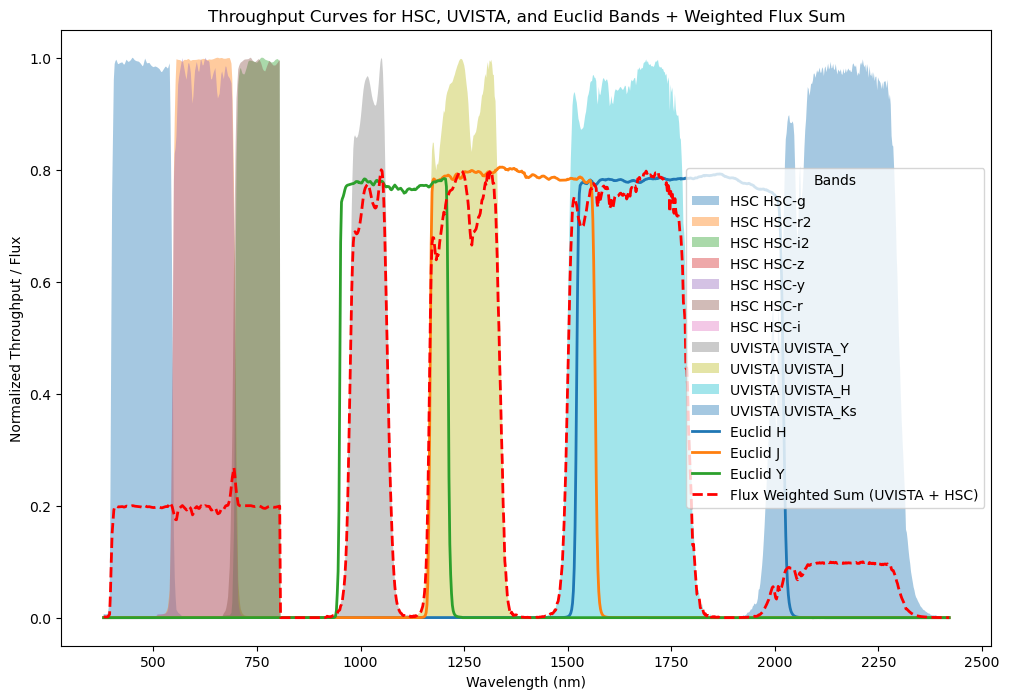

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the HSC, UVISTA, and Euclid data are already available
# HSC_bands: a dictionary with band name as keys, and a dictionary containing 'wavelength' and 'flux' as values.
# uvista_band_throughputs: a dictionary with band name as keys, and a dictionary containing 'wavelength' and 'throughput' as values.
# euclid_bands: a dictionary with band name as keys, and a tuple containing 'wavelength' and 'throughput' as values.

# Weights for the UVISTA and HSC bands
uvista_weights = {
    "UVISTA_Y": 0.8,
    "UVISTA_J": 0.8,
    "UVISTA_H": 0.8,
    "UVISTA_Ks": 0.1
}

hsc_weights = {
    "HSC-g": 0.2,
    "HSC-r": 0.2,
    "HSC-i": 0.2,
    "HSC-z": 0.2,
    "HSC-y": 0.2,
}

# Normalize the flux function
def normalize_flux(flux):
    max_flux = np.nanmax(flux)  # Use np.nanmax to avoid NaN values
    if max_flux > 0:
        return flux / max_flux
    else:
        return np.zeros_like(flux)

# Define the full wavelength range (from smallest HSC to largest UVISTA)
min_wavelength = min(min(data['wavelength']) for data in HSC_bands.values())  # Smallest HSC wavelength
max_wavelength = max(max(data['wavelength']) for data in uvista_band_throughputs.values())  # Largest UVISTA wavelength

# Create a common wavelength array that spans the entire range
common_wavelengths = np.linspace(min_wavelength, max_wavelength, 1000)

# Function to create a throughput array for a given band
def create_band_throughput(band_wavelengths, band_throughputs, common_wavelengths):
    throughput = np.zeros_like(common_wavelengths)
    # For each band, we find the indices where the common wavelengths are within the band's range
    for i, common_wavelength in enumerate(common_wavelengths):
        # Check if the common wavelength is within the band range
        if min(band_wavelengths) <= common_wavelength <= max(band_wavelengths):
            # Get the throughput corresponding to this wavelength
            throughput[i] = np.interp(common_wavelength, band_wavelengths, band_throughputs)
    return throughput

# Create throughput arrays for HSC bands
flux_hsc_norm = {}
for band, data in HSC_bands.items():
    flux_hsc_norm[band] = create_band_throughput(data['wavelength'], data['flux'], common_wavelengths)
    # Normalize the HSC fluxes
    flux_hsc_norm[band] = normalize_flux(flux_hsc_norm[band])

# Create throughput arrays for UVISTA bands
flux_uvista_norm = {}
for band, data in uvista_band_throughputs.items():
    flux_uvista_norm[band] = create_band_throughput(data["wavelength"], data["throughput"], common_wavelengths)

# Create throughput arrays for Euclid bands (not needed for the weighted sum, just to plot)
flux_euclid_norm = {}
for band, (wavelengths, throughputs) in euclid_bands.items():
    flux_euclid_norm[band] = create_band_throughput(wavelengths, throughputs, common_wavelengths)

# Calculate the weighted sum of fluxes (excluding Euclid bands)
weighted_flux = np.zeros_like(common_wavelengths)

# Sum HSC bands weighted by the corresponding weights
for band, data in flux_hsc_norm.items():
    weighted_flux += hsc_weights.get(band, 0) * data

# Sum UVISTA bands weighted by the corresponding weights
for band, data in flux_uvista_norm.items():
    weighted_flux += uvista_weights.get(band, 0) * data

# Create a figure
plt.figure(figsize=(12, 8))

# Plot the HSC bands as filled curves (normalized)
for band, data in HSC_bands.items():
    plt.fill_between(common_wavelengths, flux_hsc_norm[band], label=f"HSC {band}", alpha=0.4)

# Plot the UVISTA bands as filled curves
for band, data in uvista_band_throughputs.items():
    plt.fill_between(common_wavelengths, flux_uvista_norm[band], label=f"UVISTA {band}", alpha=0.4)

# Plot the Euclid bands as lines
for band, (wavelengths, throughputs) in euclid_bands.items():
    plt.plot(common_wavelengths, flux_euclid_norm[band], label=f"Euclid {band}", linestyle='-', linewidth=2)

# Plot the weighted flux line
plt.plot(common_wavelengths, weighted_flux, label="Flux Weighted Sum (UVISTA + HSC)", color='red', linewidth=2, linestyle='--')

# Add labels, title, and grid
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Throughput / Flux")
plt.title("Throughput Curves for HSC, UVISTA, and Euclid Bands + Weighted Flux Sum")
plt.legend(title="Bands")

# Show the plot
plt.show()


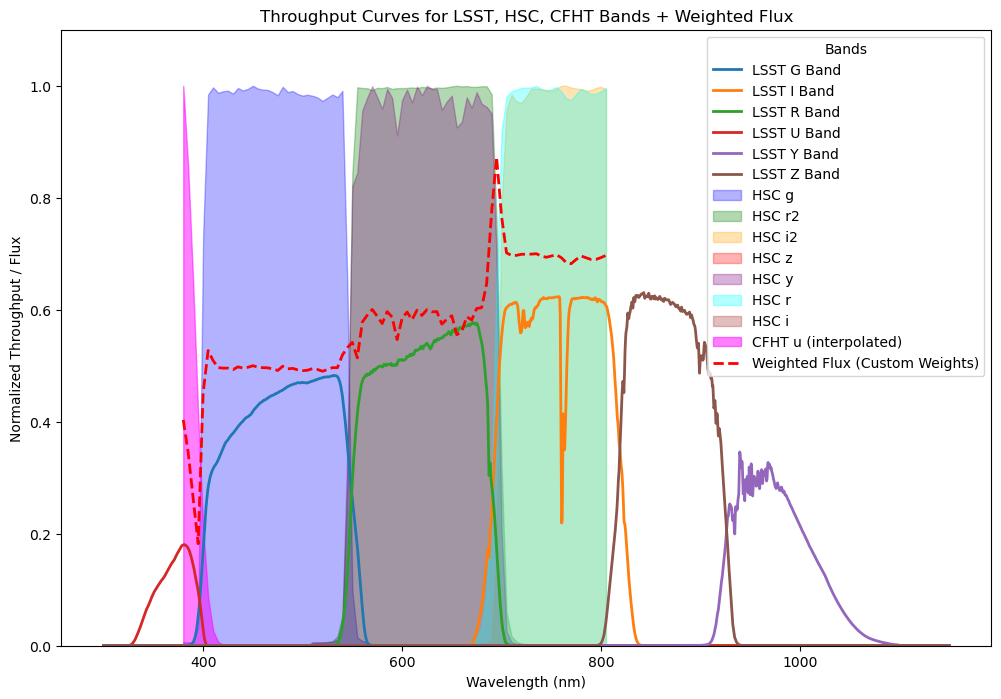

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Assuming the HSC and LSST data have already been read and are available as:
# HSC_bands (containing wavelength and flux for each band)
# lsst_bands (the dictionary for LSST bands)

# Read the CFHT throughput data
df_cfht = pd.read_csv('CFHT_throughputs.tsv', sep='\t', header=None, names=['Wavelength', 'Flux'])
wavelength_cfht = df_cfht['Wavelength'].values.astype(np.float64)
flux_cfht_u = df_cfht['Flux'].values  # Assume this corresponds to CFHT u-band

# Define the weights for each band
weights = {
    'CFHT-u': 0.4,
    'HSC-g': 0.5,
    'HSC-y': 0.6,
    'HSC-i': 0.5,
    'HSC-z': 0.7,
    'HSC-r': 0.7
}

# Interpolate CFHT fluxes to match the HSC wavelength grid
interpolate_cfht = interp1d(wavelength_cfht, flux_cfht_u, kind='linear', fill_value="extrapolate")
flux_cfht_u_interpolated = interpolate_cfht(HSC_bands['HSC-g']['wavelength'])

# Normalize the fluxes with the updated normalization function
def normalize_flux(flux):
    max_flux = np.nanmax(flux)  # Use np.nanmax to avoid NaN values
    if max_flux > 0:
        return flux / max_flux
    else:
        return np.zeros_like(flux)

# Normalize the fluxes for all HSC bands and CFHT band
flux_hsc_norm = {band: normalize_flux(data['flux']) for band, data in HSC_bands.items()}
flux_cfht_u_interpolated_norm = normalize_flux(flux_cfht_u_interpolated)

# Compute the weighted sum of fluxes
weighted_flux = (
    weights['CFHT-u'] * flux_cfht_u_interpolated_norm +
    weights['HSC-g'] * flux_hsc_norm['HSC-g'] +
    weights['HSC-y'] * flux_hsc_norm['HSC-y'] +
    weights['HSC-i'] * flux_hsc_norm['HSC-i'] +
    weights['HSC-z'] * flux_hsc_norm['HSC-z'] +
    weights['HSC-r'] * flux_hsc_norm['HSC-r']
)

# Plot the result
plt.figure(figsize=(12, 8))

# Plot the LSST bands with lines (using the existing `lsst_bands` dictionary)
for band, (wavelengths, throughputs) in lsst_bands.items():
    plt.plot(wavelengths, throughputs, label=f"LSST {band.upper()} Band", linestyle='-', linewidth=2)

# Plot the exact HSC bands with filled curves (alpha=0.3)
plt.fill_between(HSC_bands['HSC-g']['wavelength'], flux_hsc_norm['HSC-g'], label="HSC g", color='blue', alpha=0.3)
plt.fill_between(HSC_bands['HSC-r2']['wavelength'], flux_hsc_norm['HSC-r2'], label="HSC r2", color='green', alpha=0.3)
plt.fill_between(HSC_bands['HSC-i2']['wavelength'], flux_hsc_norm['HSC-i2'], label="HSC i2", color='orange', alpha=0.3)
plt.fill_between(HSC_bands['HSC-z']['wavelength'], flux_hsc_norm['HSC-z'], label="HSC z", color='red', alpha=0.3)
plt.fill_between(HSC_bands['HSC-y']['wavelength'], flux_hsc_norm['HSC-y'], label="HSC y", color='purple', alpha=0.3)
plt.fill_between(HSC_bands['HSC-r']['wavelength'], flux_hsc_norm['HSC-r'], label="HSC r", color='cyan', alpha=0.3)
plt.fill_between(HSC_bands['HSC-i']['wavelength'], flux_hsc_norm['HSC-i'], label="HSC i", color='brown', alpha=0.3)

# Plot CFHT u-band (interpolated) with filled curve
plt.fill_between(HSC_bands['HSC-g']['wavelength'], flux_cfht_u_interpolated_norm, label="CFHT u (interpolated)", color='magenta', alpha=0.5)

# Plot the weighted flux as a red line
plt.plot(HSC_bands['HSC-g']['wavelength'], weighted_flux, label="Weighted Flux (Custom Weights)", color='red', linewidth=2, linestyle='--')

# Add labels, title, and grid
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Throughput / Flux")
plt.title("Throughput Curves for LSST, HSC, CFHT Bands + Weighted Flux")
plt.legend(title="Bands")

# Adjust the y-axis to make sure all fluxes are visible (log scale or linear scale)
plt.ylim(0, 1.1)  # Ensures we see all curves that range between 0 and 1

# Show the plot
plt.show()


In [71]:
print(lsst_bands)

{'g': (array([ 300. ,  300.1,  300.2, ..., 1149.8, 1149.9, 1150. ]), array([0., 0., 0., ..., 0., 0., 0.])), 'i': (array([ 300. ,  300.1,  300.2, ..., 1149.8, 1149.9, 1150. ]), array([0., 0., 0., ..., 0., 0., 0.])), 'r': (array([ 300. ,  300.1,  300.2, ..., 1149.8, 1149.9, 1150. ]), array([0., 0., 0., ..., 0., 0., 0.])), 'u': (array([ 300. ,  300.1,  300.2, ..., 1149.8, 1149.9, 1150. ]), array([0., 0., 0., ..., 0., 0., 0.])), 'y': (array([ 300. ,  300.1,  300.2, ..., 1149.8, 1149.9, 1150. ]), array([0., 0., 0., ..., 0., 0., 0.])), 'z': (array([ 300. ,  300.1,  300.2, ..., 1149.8, 1149.9, 1150. ]), array([0., 0., 0., ..., 0., 0., 0.]))}


In [131]:
import pandas as pd

# Read the SC_z_throughput.tsv file into a DataFrame
df_sc_z = pd.read_csv('SC_z_throughput.tsv', delim_whitespace=True, header=None, names=['Wavelength', 'Throughput'])

# Convert the data to a dictionary
sc_z = {
    'wavelength': df_sc_z['Wavelength'].values / 10,
    'throughput': df_sc_z['Throughput'].values
}

# Print the first few entries of the dictionary to verify
print(sc_z)

{'wavelength': array([ 791.4 ,  792.83,  794.26,  795.68,  797.11,  798.54,  799.97,
        801.39,  802.82,  804.25,  805.68,  807.1 ,  808.53,  809.96,
        811.38,  812.81,  814.24,  815.67,  817.09,  818.52,  819.95,
        821.38,  822.8 ,  824.23,  825.66,  827.08,  828.51,  829.94,
        831.37,  832.79,  834.22,  835.65,  837.08,  838.5 ,  839.93,
        841.36,  842.78,  844.21,  845.64,  847.07,  848.49,  849.92,
        851.35,  852.78,  854.2 ,  855.63,  857.06,  858.48,  859.91,
        861.34,  862.77,  864.19,  865.62,  867.05,  868.47,  869.9 ,
        871.33,  872.76,  874.18,  875.61,  877.04,  878.47,  879.89,
        881.32,  882.75,  884.17,  885.6 ,  887.03,  888.46,  889.88,
        891.31,  892.74,  894.17,  895.59,  897.02,  898.45,  899.87,
        901.3 ,  902.73,  904.16,  905.58,  907.01,  908.44,  909.87,
        911.29,  912.72,  914.15,  915.57,  917.  ,  918.43,  919.86,
        921.28,  922.71,  924.14,  925.57,  926.99,  928.42,  929.85,
     

/var/folders/lv/971vq_w520x0m61v8y5l6d_00000gn/T/ipykernel_21365/2955185854.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_sc_z = pd.read_csv('SC_z_throughput.tsv', delim_whitespace=True, header=None, names=['Wavelength', 'Throughput'])


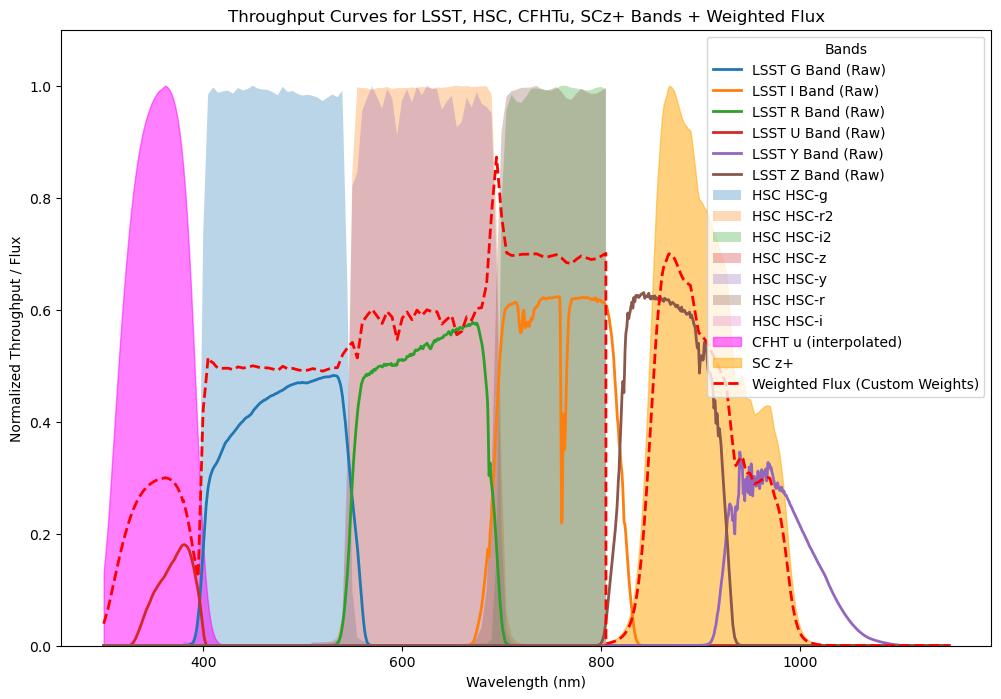

In [159]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd

# Assuming HSC and LSST data have already been read and are available as:
# HSC_bands (containing wavelength and flux for each band)
# lsst_bands_dict (the dictionary for LSST bands)
# sc_z is already loaded in your environment as a dictionary, e.g.:
# sc_z = {'wavelength': sc_z_wavelength_array, 'throughput': sc_z_throughput_array}

# Define the new weights
weights = {
    'CFHT-u': 0.3,
    'HSC-g': 0.5,
    'HSC-y': 0.6,
    'HSC-i': 0.5,
    'HSC-z': 0.7,
    'HSC-r': 0.7,
    'SC-z': 0.7
}

# Choose a wavelength grid from one of the LSST bands as the common wavelength
common_wavelength = lsst_bands_dict['g']['wavelength']  # Use the LSST g-band wavelength as the common grid

# Read the CFHT throughput data
df_cfht = pd.read_csv('CFHT_throughputs.tsv', sep='\t', header=None, names=['Wavelength', 'Flux'])
wavelength_cfht = df_cfht['Wavelength'].values.astype(np.float64)
flux_cfht_u = df_cfht['Flux'].values  # Assume this corresponds to CFHT u-band

# Interpolate CFHT fluxes to match the common wavelength grid
interpolate_cfht = interp1d(wavelength_cfht, flux_cfht_u, kind='linear', fill_value="extrapolate")
flux_cfht_u_interpolated = interpolate_cfht(common_wavelength)

# Normalize the fluxes with the updated normalization function
def normalize_flux(flux):
    max_flux = np.nanmax(flux)  # Use np.nanmax to avoid NaN values
    if max_flux > 0:
        return flux / max_flux
    else:
        return np.zeros_like(flux)

# Function to handle interpolation with boundary checks (avoiding extreme extrapolation)
def safe_interp(wavelengths, flux, common_wavelength):
    interp_func = interp1d(wavelengths, flux, kind='linear', fill_value="extrapolate")
    # Ensure that the extrapolation is limited to known ranges
    min_wavelength, max_wavelength = wavelengths.min(), wavelengths.max()
    
    # Cap the common_wavelengths outside the band's range to 0 flux
    valid_wavelength = np.logical_and(common_wavelength >= min_wavelength, common_wavelength <= max_wavelength)
    flux_values = np.zeros_like(common_wavelength)
    flux_values[valid_wavelength] = interp_func(common_wavelength[valid_wavelength])
    
    return flux_values

# Check for infinite values and replace with zeros or small values
def clean_flux(flux):
    flux[np.isinf(flux)] = 0  # Replace inf values with 0
    flux[np.isnan(flux)] = 0  # Replace NaN values with 0
    return flux

# Normalize the fluxes for all HSC bands, LSST bands, CFHT band, and SC_z band
flux_hsc_norm = {
    band: normalize_flux(clean_flux(safe_interp(data['wavelength'], data['flux'], common_wavelength))) 
    for band, data in HSC_bands.items()
}
flux_cfht_u_interpolated_norm = normalize_flux(clean_flux(flux_cfht_u_interpolated))

# Normalize the SC_z band to the common wavelength grid
flux_sc_z_norm = normalize_flux(clean_flux(safe_interp(sc_z['wavelength'], sc_z['throughput'], common_wavelength)))

# Normalize the LSST bands (assuming `lsst_bands_dict` is structured as a dictionary of (wavelength, throughput))
flux_lsst_norm = {
    band: normalize_flux(clean_flux(safe_interp(data['wavelength'], data['throughput'], common_wavelength)))
    for band, data in lsst_bands_dict.items()
}

# Compute the weighted sum of fluxes
weighted_flux = (
    weights['CFHT-u'] * flux_cfht_u_interpolated_norm +
    weights['HSC-g'] * flux_hsc_norm['HSC-g'] +
    weights['HSC-y'] * flux_hsc_norm['HSC-y'] +
    weights['HSC-i'] * flux_hsc_norm['HSC-i'] +
    weights['HSC-z'] * flux_hsc_norm['HSC-z'] +
    weights['HSC-r'] * flux_hsc_norm['HSC-r'] +
    weights['SC-z'] * flux_sc_z_norm
)

# Plot the result
plt.figure(figsize=(12, 8))

# Plot the LSST bands with lines
for band, data in lsst_bands_dict.items():
    plt.plot(data['wavelength'], data['throughput'], label=f"LSST {band.upper()} Band (Raw)", linestyle='-', linewidth=2)

# Plot the exact HSC bands with filled curves (alpha=0.3)
for band, data in HSC_bands.items():
    # Interpolate the HSC wavelengths and fluxes to the common wavelength grid
    hsc_flux_norm = flux_hsc_norm[band]
    plt.fill_between(common_wavelength, hsc_flux_norm, label=f"HSC {band}", alpha=0.3)

# Plot CFHT u-band (interpolated) with filled curve
plt.fill_between(common_wavelength, flux_cfht_u_interpolated_norm, label="CFHT u (interpolated)", color='magenta', alpha=0.5)

# Plot SC_z band with filled curve (on the same wavelength grid)
plt.fill_between(common_wavelength, flux_sc_z_norm, label="SC z+", color='orange', alpha=0.5)

# Plot the weighted flux as a red line
plt.plot(common_wavelength, weighted_flux, label="Weighted Flux (Custom Weights)", color='red', linewidth=2, linestyle='--')

# Add labels, title, and grid
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Throughput / Flux")
plt.title("Throughput Curves for LSST, HSC, CFHTu, SCz+ Bands + Weighted Flux")
plt.legend(title="Bands")

# Adjust the y-axis to make sure all fluxes are visible (log scale or linear scale)
plt.ylim(0, 1.1)  # Ensures we see all curves that range between 0 and 1

# Show the plot
plt.show()


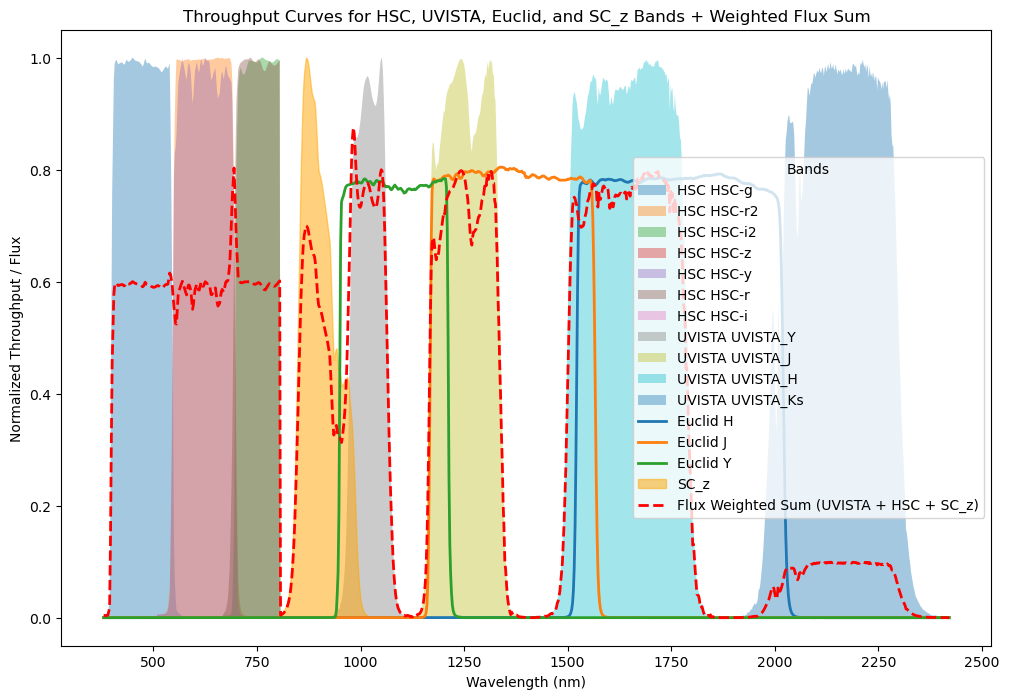

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Assuming the HSC, UVISTA, and Euclid data are already available
# HSC_bands: a dictionary with band name as keys, and a dictionary containing 'wavelength' and 'flux' as values.
# uvista_band_throughputs: a dictionary with band name as keys, and a dictionary containing 'wavelength' and 'throughput' as values.
# euclid_bands: a dictionary with band name as keys, and a tuple containing 'wavelength' and 'throughput' as values.
# sc_z: already loaded in your environment as a dictionary, e.g.:
# sc_z = {'wavelength': sc_z_wavelength_array, 'throughput': sc_z_throughput_array}

# Weights for the UVISTA, HSC, and SC_z bands
uvista_weights = {
    "UVISTA_Y": 0.8,
    "UVISTA_J": 0.8,
    "UVISTA_H": 0.8,
    "UVISTA_Ks": 0.1
}

hsc_weights = {
    "HSC-g": 0.6,
    "HSC-r": 0.6,
    "HSC-i": 0.6,
    "HSC-z": 0.6,
    "HSC-y": 0.6,
}

sc_z_weight = 0.7  # Weight for SC_z band

# Normalize the flux function
def normalize_flux(flux):
    max_flux = np.nanmax(flux)  # Use np.nanmax to avoid NaN values
    if max_flux > 0:
        return flux / max_flux
    else:
        return np.zeros_like(flux)

# Define the full wavelength range (from smallest HSC to largest UVISTA and SC_z)
min_wavelength = min(min(data['wavelength']) for data in HSC_bands.values())  # Smallest HSC wavelength
max_wavelength = max(max(data['wavelength']) for data in uvista_band_throughputs.values())  # Largest UVISTA wavelength
max_wavelength = max(max_wavelength, max(sc_z['wavelength']))  # Ensure SC_z is also considered

# Create a common wavelength array that spans the entire range
common_wavelengths = np.linspace(min_wavelength, max_wavelength, 1000)

# Function to create a throughput array for a given band
def create_band_throughput(band_wavelengths, band_throughputs, common_wavelengths):
    throughput = np.zeros_like(common_wavelengths)
    # For each band, we find the indices where the common wavelengths are within the band's range
    for i, common_wavelength in enumerate(common_wavelengths):
        # Check if the common wavelength is within the band range
        if min(band_wavelengths) <= common_wavelength <= max(band_wavelengths):
            # Get the throughput corresponding to this wavelength
            throughput[i] = np.interp(common_wavelength, band_wavelengths, band_throughputs)
    return throughput

# Create throughput arrays for HSC bands
flux_hsc_norm = {}
for band, data in HSC_bands.items():
    flux_hsc_norm[band] = create_band_throughput(data['wavelength'], data['flux'], common_wavelengths)
    # Normalize the HSC fluxes
    flux_hsc_norm[band] = normalize_flux(flux_hsc_norm[band])

# Create throughput arrays for UVISTA bands
flux_uvista_norm = {}
for band, data in uvista_band_throughputs.items():
    flux_uvista_norm[band] = create_band_throughput(data["wavelength"], data["throughput"], common_wavelengths)

# Create throughput arrays for Euclid bands (not needed for the weighted sum, just to plot)
flux_euclid_norm = {}
for band, (wavelengths, throughputs) in euclid_bands.items():
    flux_euclid_norm[band] = create_band_throughput(wavelengths, throughputs, common_wavelengths)

# Normalize the SC_z band to the common wavelength grid
def safe_interp(wavelengths, flux, common_wavelength):
    interp_func = interp1d(wavelengths, flux, kind='linear', fill_value="extrapolate")
    # Ensure that the extrapolation is limited to known ranges
    min_wavelength, max_wavelength = wavelengths.min(), wavelengths.max()
    valid_wavelength = np.logical_and(common_wavelength >= min_wavelength, common_wavelength <= max_wavelength)
    flux_values = np.zeros_like(common_wavelength)
    flux_values[valid_wavelength] = interp1d(wavelengths, flux)(common_wavelength[valid_wavelength])
    return flux_values

flux_sc_z_norm = normalize_flux(safe_interp(sc_z['wavelength'], sc_z['throughput'], common_wavelengths))

# Calculate the weighted sum of fluxes (excluding Euclid bands)
weighted_flux = np.zeros_like(common_wavelengths)

# Sum HSC bands weighted by the corresponding weights
for band, data in flux_hsc_norm.items():
    weighted_flux += hsc_weights.get(band, 0) * data

# Sum UVISTA bands weighted by the corresponding weights
for band, data in flux_uvista_norm.items():
    weighted_flux += uvista_weights.get(band, 0) * data

# Sum SC_z band weighted by its corresponding weight
weighted_flux += sc_z_weight * flux_sc_z_norm

# Create a figure
plt.figure(figsize=(12, 8))

# Plot the HSC bands as filled curves (normalized)
for band, data in HSC_bands.items():
    plt.fill_between(common_wavelengths, flux_hsc_norm[band], label=f"HSC {band}", alpha=0.4)

# Plot the UVISTA bands as filled curves
for band, data in uvista_band_throughputs.items():
    plt.fill_between(common_wavelengths, flux_uvista_norm[band], label=f"UVISTA {band}", alpha=0.4)

# Plot the Euclid bands as lines
for band, (wavelengths, throughputs) in euclid_bands.items():
    plt.plot(common_wavelengths, flux_euclid_norm[band], label=f"Euclid {band}", linestyle='-', linewidth=2)

# Plot the SC_z band with filled curve (on the same wavelength grid)
plt.fill_between(common_wavelengths, flux_sc_z_norm, label="SC_z", color='orange', alpha=0.5)

# Plot the weighted flux line
plt.plot(common_wavelengths, weighted_flux, label="Flux Weighted Sum (UVISTA + HSC + SC_z)", color='red', linewidth=2, linestyle='--')

# Add labels, title, and grid
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Throughput / Flux")
plt.title("Throughput Curves for HSC, UVISTA, Euclid, and SC_z Bands + Weighted Flux Sum")
plt.legend(title="Bands")

# Show the plot
plt.show()


Processing HSC band: HSC-z
Processing HSC band: HSC-r
Processing HSC band: HSC-i


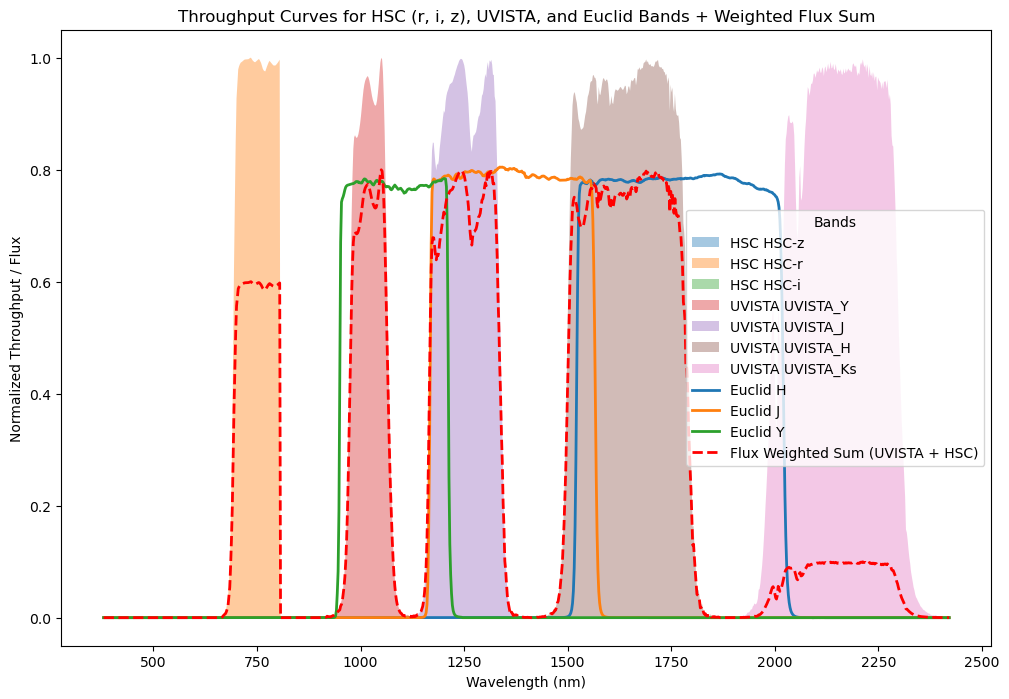

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Assuming the HSC, UVISTA, and Euclid data are already available
# HSC_bands: a dictionary with band name as keys, and a dictionary containing 'wavelength' and 'flux' as values.
# uvista_band_throughputs: a dictionary with band name as keys, and a dictionary containing 'wavelength' and 'throughput' as values.
# euclid_bands: a dictionary with band name as keys, and a tuple containing 'wavelength' and 'throughput' as values.

# Weights for the UVISTA, HSC bands
hsc_weights = {
    "HSC-r": 0.6,
    "HSC-i": 0.6,
    "HSC-z": 0.6
}

uvista_weights = {
    "UVISTA_Y": 0.8,
    "UVISTA_J": 0.8,
    "UVISTA_H": 0.8,
    "UVISTA_Ks": 0.1
}

# Normalize the flux function
def normalize_flux(flux):
    max_flux = np.nanmax(flux)  # Use np.nanmax to avoid NaN values
    if max_flux > 0:
        return flux / max_flux
    else:
        return np.zeros_like(flux)

# Define the full wavelength range (from smallest HSC to largest UVISTA)
min_wavelength = min(min(data['wavelength']) for data in HSC_bands.values())  # Smallest HSC wavelength
max_wavelength = max(max(data['wavelength']) for data in uvista_band_throughputs.values())  # Largest UVISTA wavelength

# Create a common wavelength array that spans the entire range
common_wavelengths = np.linspace(min_wavelength, max_wavelength, 1000)

# Function to create a throughput array for a given band
def create_band_throughput(band_wavelengths, band_throughputs, common_wavelengths):
    throughput = np.zeros_like(common_wavelengths)
    # For each band, we find the indices where the common wavelengths are within the band's range
    for i, common_wavelength in enumerate(common_wavelengths):
        # Check if the common wavelength is within the band range
        if min(band_wavelengths) <= common_wavelength <= max(band_wavelengths):
            # Get the throughput corresponding to this wavelength
            throughput[i] = np.interp(common_wavelength, band_wavelengths, band_throughputs)
    return throughput

# Create throughput arrays for HSC bands (only r, i, z bands)
flux_hsc_norm = {}
for band, data in HSC_bands.items():
    if band in hsc_weights:  # Only process the r, i, z bands
        print(f"Processing HSC band: {band}")  # Debugging print statement
        # Interpolate and normalize the fluxes for HSC bands
        flux_hsc_norm[band] = create_band_throughput(data['wavelength'], data['flux'], common_wavelengths)
        flux_hsc_norm[band] = normalize_flux(flux_hsc_norm[band])

# Create throughput arrays for UVISTA bands (all bands)
flux_uvista_norm = {}
for band, data in uvista_band_throughputs.items():
    flux_uvista_norm[band] = create_band_throughput(data["wavelength"], data["throughput"], common_wavelengths)

# Create throughput arrays for Euclid bands (all bands)
flux_euclid_norm = {}
for band, (wavelengths, throughputs) in euclid_bands.items():
    flux_euclid_norm[band] = create_band_throughput(wavelengths, throughputs, common_wavelengths)

# Calculate the weighted sum of fluxes (excluding Euclid bands)
weighted_flux = np.zeros_like(common_wavelengths)

# Sum HSC bands weighted by the corresponding weights (only r, i, z bands)
for band, data in flux_hsc_norm.items():
    weighted_flux += hsc_weights.get(band, 0) * data

# Sum UVISTA bands weighted by the corresponding weights
for band, data in flux_uvista_norm.items():
    weighted_flux += uvista_weights.get(band, 0) * data

# Create a figure
plt.figure(figsize=(12, 8))

# Plot the HSC bands as filled curves (normalized)
for band, data in flux_hsc_norm.items():
    plt.fill_between(common_wavelengths, flux_hsc_norm[band], label=f"HSC {band}", alpha=0.4)

# Plot the UVISTA bands as filled curves (all bands)
for band, data in flux_uvista_norm.items():
    plt.fill_between(common_wavelengths, flux_uvista_norm[band], label=f"UVISTA {band}", alpha=0.4)

# Plot the Euclid bands as lines (all bands, for visualization)
for band, (wavelengths, throughputs) in euclid_bands.items():
    plt.plot(common_wavelengths, flux_euclid_norm[band], label=f"Euclid {band}", linestyle='-', linewidth=2)

# Plot the weighted flux line
plt.plot(common_wavelengths, weighted_flux, label="Flux Weighted Sum (UVISTA + HSC)", color='red', linewidth=2, linestyle='--')

# Add labels, title, and grid
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Throughput / Flux")
plt.title("Throughput Curves for HSC (r, i, z), UVISTA, and Euclid Bands + Weighted Flux Sum")
plt.legend(title="Bands")

# Show the plot
plt.show()


In [169]:
flux_hsc_norm

{'HSC-z': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   